As a data scientist working in the healthcare industry, your task is to develop a convolutional neural network (CNN) model that can classify medical images into their respective categories. The model should be able to accurately identify the type of medical image shown in an image, based on the image itself.


To complete the task, you can use the following dataset containing 18000+ color images of medical conditions from 5 different categories: Brain MRI,  Chest CT, Abdomen CT, Hand X-ray, and Chest X-ray. Each image is of varying size and has three color channels (RGB). You need to split the dataset for training, validation and testing purpose. 
Note that you may need to preprocess the dataset and balance the classes to avoid a biased model.

In [2]:
# from zipfile import ZipFile
# import os


In [3]:
# dataSet = ZipFile('./data//CNN_dataset.zip', 'r')
# dataSet.extractall('./data')


In [4]:
import os

for dirname, _, filenames in os.walk('./data/CNN_dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./data/CNN_dataset/.DS_Store
./data/CNN_dataset/README.md
./data/CNN_dataset/AbdomenCT\000000.jpeg
./data/CNN_dataset/AbdomenCT\000001.jpeg
./data/CNN_dataset/AbdomenCT\000002.jpeg
./data/CNN_dataset/AbdomenCT\000003.jpeg
./data/CNN_dataset/AbdomenCT\000004.jpeg
./data/CNN_dataset/AbdomenCT\000005.jpeg
./data/CNN_dataset/AbdomenCT\000006.jpeg
./data/CNN_dataset/AbdomenCT\000007.jpeg
./data/CNN_dataset/AbdomenCT\000008.jpeg
./data/CNN_dataset/AbdomenCT\000009.jpeg
./data/CNN_dataset/AbdomenCT\000010.jpeg
./data/CNN_dataset/AbdomenCT\000011.jpeg
./data/CNN_dataset/AbdomenCT\000012.jpeg
./data/CNN_dataset/AbdomenCT\000013.jpeg
./data/CNN_dataset/AbdomenCT\000014.jpeg
./data/CNN_dataset/AbdomenCT\000015.jpeg
./data/CNN_dataset/AbdomenCT\000016.jpeg
./data/CNN_dataset/AbdomenCT\000017.jpeg
./data/CNN_dataset/AbdomenCT\000018.jpeg
./data/CNN_dataset/AbdomenCT\000019.jpeg
./data/CNN_dataset/AbdomenCT\000020.jpeg
./data/CNN_dataset/AbdomenCT\000021.jpeg
./data/CNN_dataset/AbdomenCT\000022.jpeg

In [5]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image
import cv2
from keras import models
from keras import layers
from keras import activations
from keras import Model
from keras import callbacks

%matplotlib inline


In [6]:
classes = {'AbdomenCT': 0, 'ChestCT': 1, 'CXR': 2, 'Hand': 3, 'HeadCT': 4}


In [7]:
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE = 64
N_CLASSES = 5
EPOCHS = 5


In [8]:
adbomen_DIR = './data/CNN_dataset/AbdomenCT'
chest_DIR = './data/CNN_dataset/ChestCT'
cxr_DIR = './data/CNN_dataset/CXR'
hand_DIR = './data/CNN_dataset/Hand'
head_DIR = './data/CNN_dataset/HeadCT'


In [9]:
def assign_label(img, class_type):
    return class_type


X = []
y = []


def make_train_data(class_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, class_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, IMAGE_SIZE)

        X.append(np.array(img))
        y.append(str(label))


In [10]:
make_train_data(classes.get('AbdomenCT'), adbomen_DIR)


100%|██████████| 10000/10000 [01:23<00:00, 119.97it/s]


In [11]:
make_train_data(classes.get('ChestCT'), chest_DIR)

100%|██████████| 10000/10000 [01:31<00:00, 109.29it/s]


In [12]:
make_train_data(classes.get('CXR'), cxr_DIR) 


100%|██████████| 10000/10000 [01:51<00:00, 90.09it/s] 


In [13]:
make_train_data(classes.get('Hand'), hand_DIR)


100%|██████████| 10000/10000 [01:25<00:00, 116.75it/s]


In [14]:
make_train_data(classes.get('HeadCT'), head_DIR)


100%|██████████| 10000/10000 [01:28<00:00, 112.44it/s]


In [15]:
len(X)
X = np.array(X)
y = np.array(y)


In [16]:
X.shape, y.shape


((50000, 64, 64, 3), (50000,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.1, random_state=50000)


In [18]:
k = len(set(y_train))
print("Number of classes: ", k)

Number of classes:  5


In [19]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [20]:
y_train = to_categorical(y_train, k)
y_test = to_categorical(y_test, k)


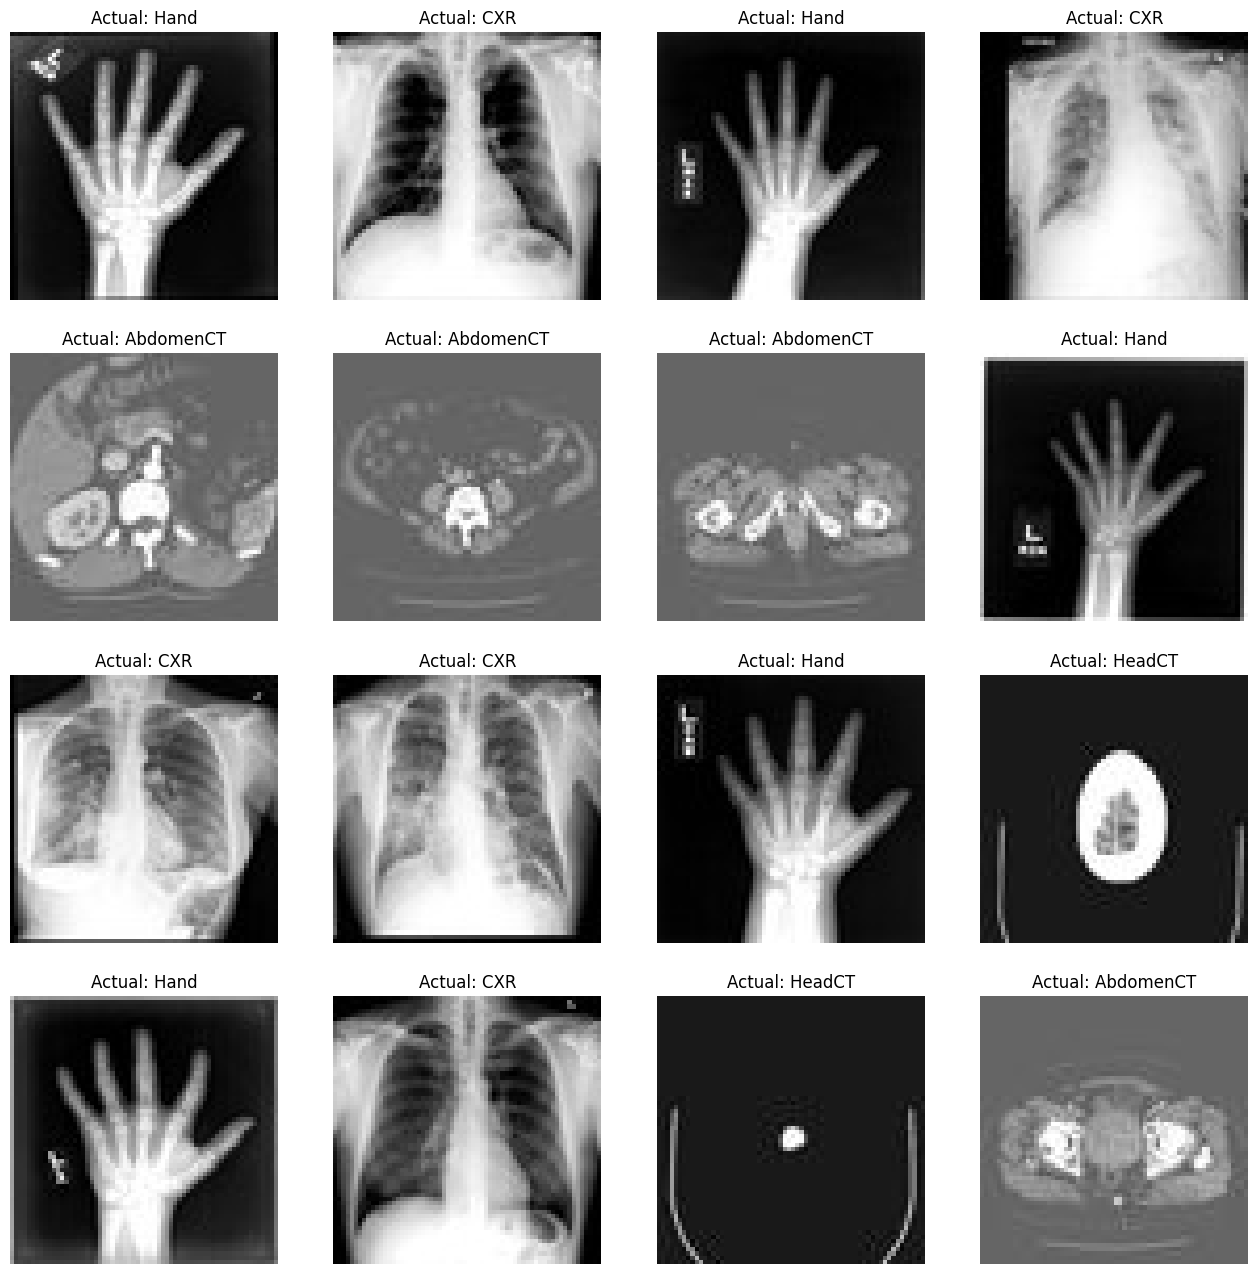

In [21]:
labels = '''AbdomenCT
ChestCT
CXR
Hand
HeadCT'''.split("\n")

plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 16):
    plt.subplot(4, 4, j)
    j += 1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title("Actual: {}".format(labels[np.argmax(y_train[i])]))


In [22]:
i = layers.Input(shape=X_train[0].shape)
x = layers.Conv2D(64, (3, 3), activation='relu',
                  strides=(2, 2), padding='same')(i)
x = layers.Conv2D(64, (3, 3), activation='relu',
                  strides=(2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu',
                  strides=(2, 2), padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(k, activation='softmax')(x)

model = Model(i, x)


In [23]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=3, min_lr=0.00001)

model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
          validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/5
704/704 [==============================] - 86s 116ms/step - loss: 0.0707 - accuracy: 0.9760 - val_loss: 0.0068 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 2/5
704/704 [==============================] - 93s 133ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.0044 - val_accuracy: 0.9980 - lr: 0.0010
Epoch 3/5
704/704 [==============================] - 98s 139ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0128 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 4/5
704/704 [==============================] - 94s 133ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0083 - val_accuracy: 0.9966 - lr: 0.0010
Epoch 5/5
704/704 [==============================] - 86s 122ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0055 - val_accuracy: 0.9982 - lr: 0.0010


The class of this is: 1


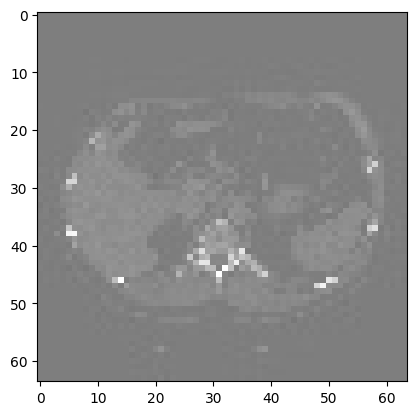

In [25]:
print("The class of this is: {}".format(np.argmax(y_train[10])))
plt.imshow(X_train[10], cmap='Greys')
plt.show()

157/157 [==============================] - 3s 18ms/step
Confusion matrix, without normalization
[[ 974    0    0    0    0]
 [   0 1029    0    0    0]
 [   0    0 1005    2    0]
 [   0    0    7  987    0]
 [   0    0    0    0  996]]


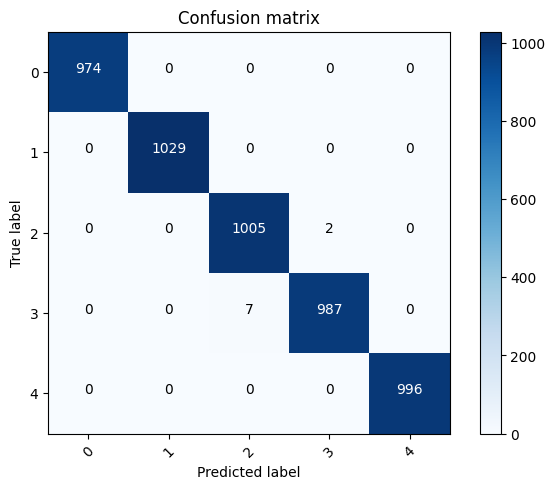

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(np.argmax(y_test, axis= 1), p_test)
plot_confusion_matrix(cm, list(range(5)))

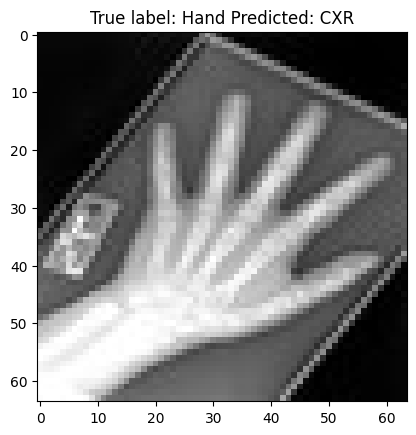

In [27]:
#checking misclassified images
misclassified_idx = np.where(p_test != np.argmax(y_test, axis= 1))[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[np.argmax(y_test[i])], labels[p_test[i]]));

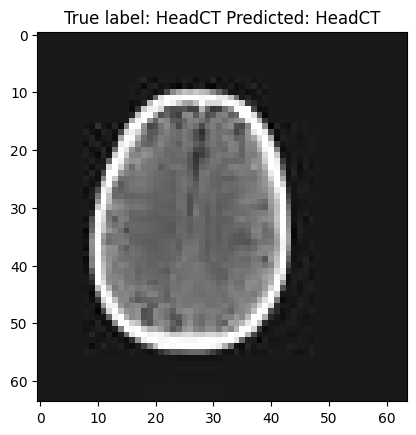

In [28]:
# check random images
i = np.random.randint(0, len(X_test))
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[np.argmax(y_test[i])], labels[p_test[i]]));